In [2]:
import numpy as np 
import pandas as pd
import pandas_profiling as pp
# تحلیل گسترده ای از یک دیتا ست را به صورت اچ تی ام ال و جیسون میدهد
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


C:\Users\mohammadreza\AppData\Local\Temp\ipykernel_6868\1310648259.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [5]:
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

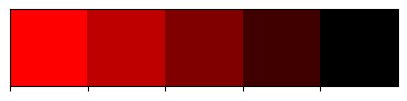

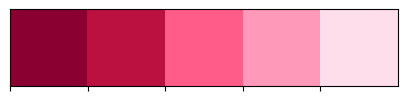

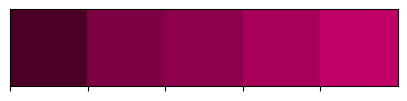

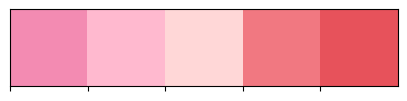

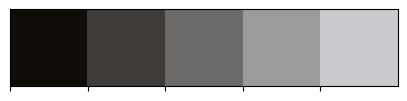

In [6]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [7]:
# --- Importing Dataset ---
gold_data = pd.read_csv("gld_price_data.csv")

# --- Reading Dataset ---
gold_data.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'})


In [8]:
#This article describes how to check if pandas.DataFrame and pandas.Series contain NaN and count the number of NaN. You can use the isnull() and isna() methods. It should be noted, however, that the isnan() method is not provided.
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'})

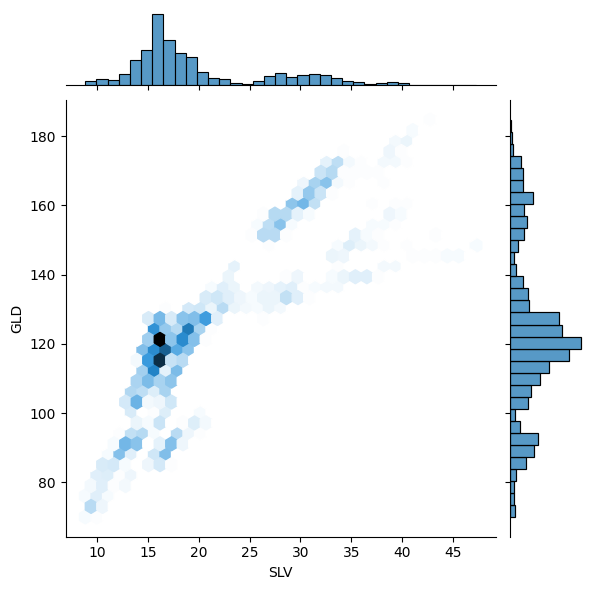

In [10]:
sns.jointplot(x='SLV',y='GLD',kind='hex',data=gold_data)

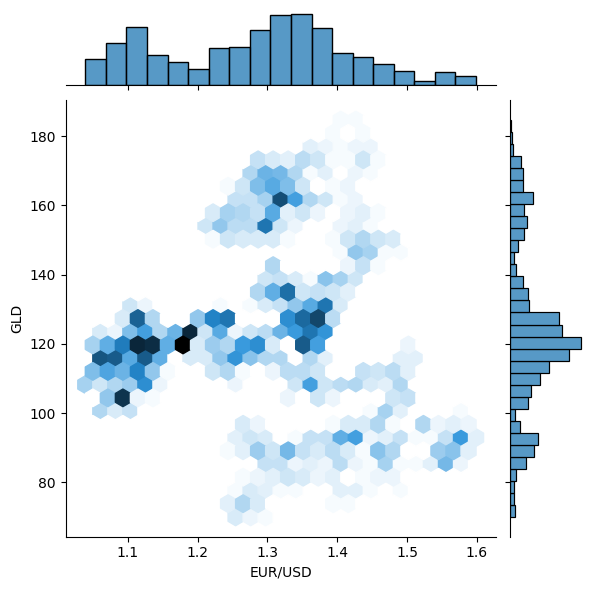

In [11]:
sns.jointplot(x='EUR/USD',y='GLD',kind='hex',data=gold_data)

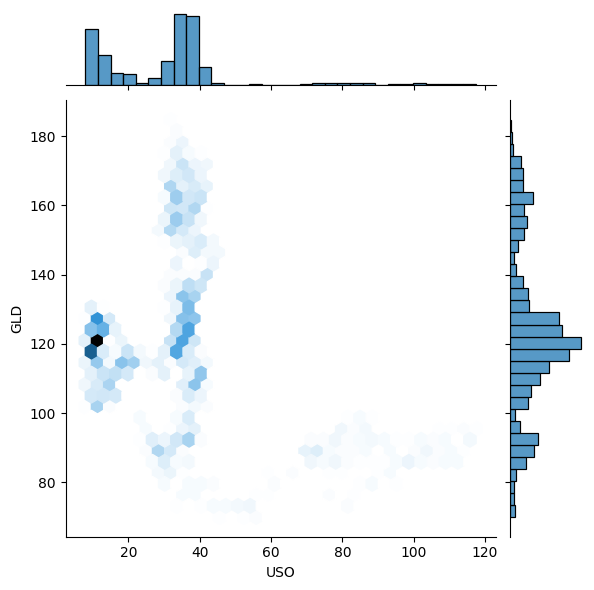

In [12]:
sns.jointplot(x='USO',y='GLD',kind='hex',data=gold_data)

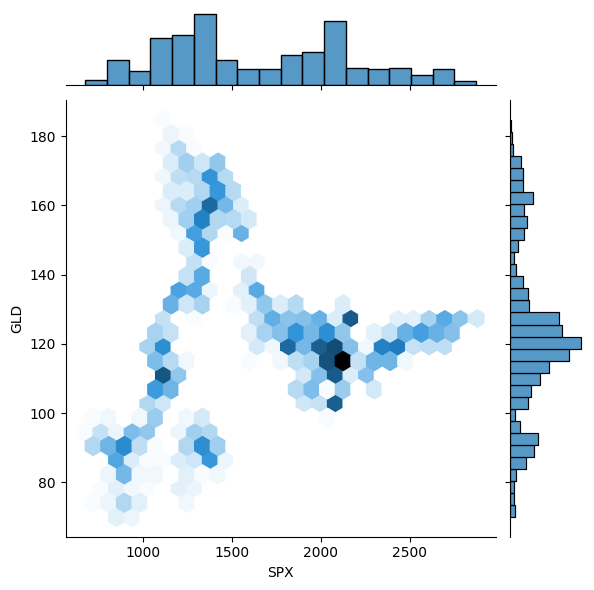

In [13]:
sns.jointplot(x='SPX',y='GLD',kind='hex',data=gold_data)

f:\2014\machine learning\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


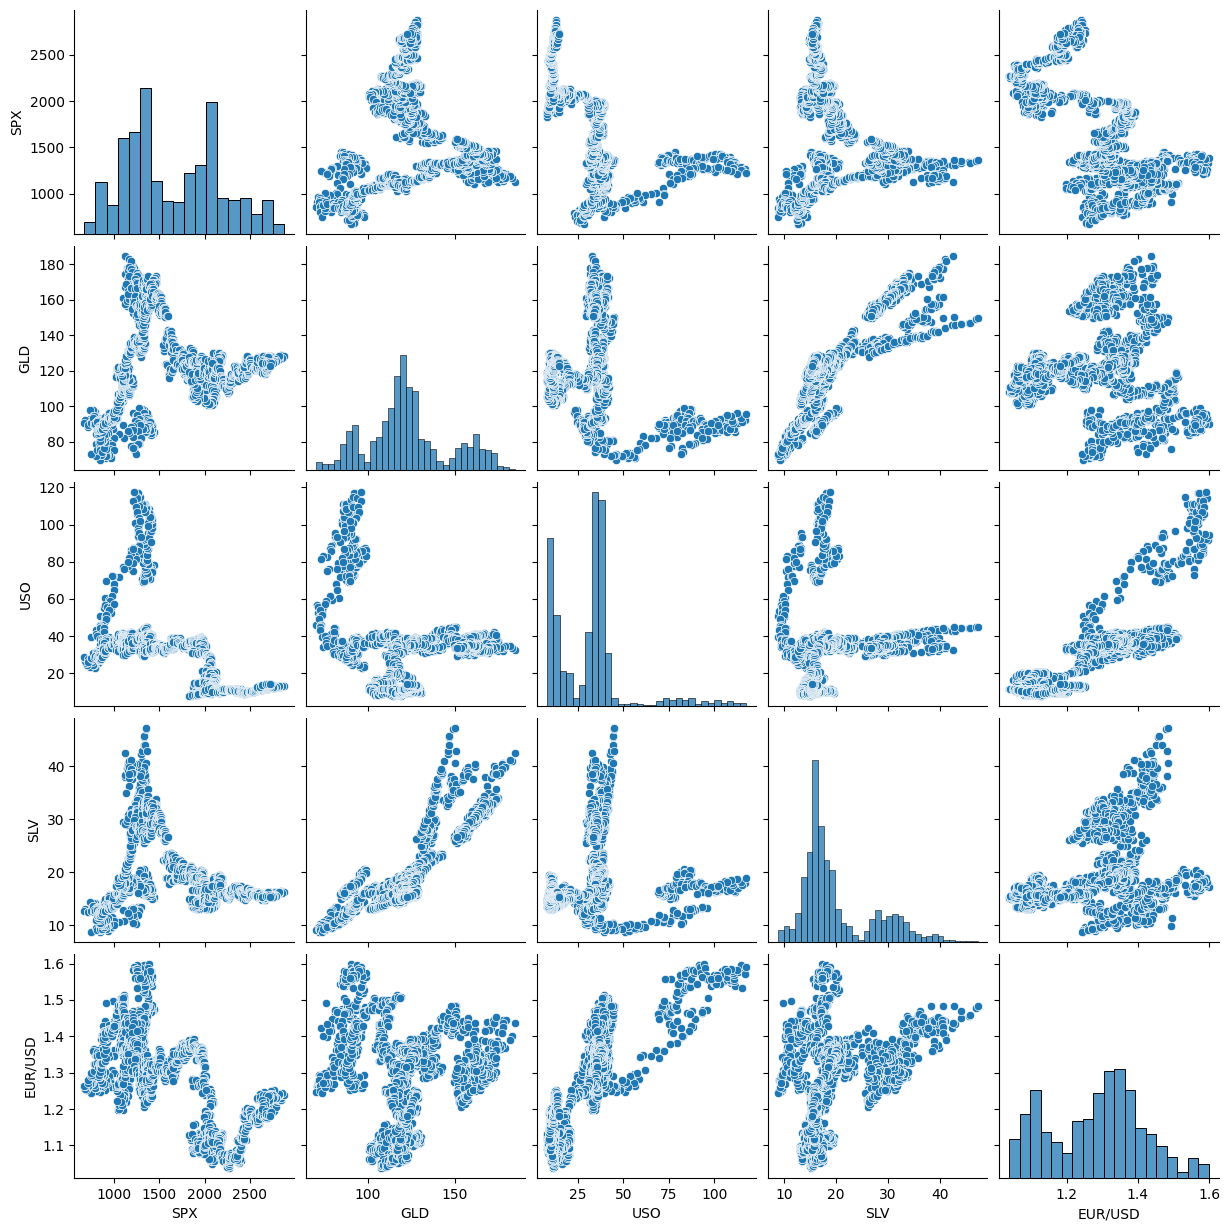

In [15]:
sns.pairplot(gold_data)

In [30]:
#This section will focused on Auto Visualization before applying ML models
#!pip install autoviz

Imported v0.1.730. After importing autoviz, execute '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (2290, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    6 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Date']
To fix data quality issues automatically, import FixDQ from autoviz...


Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 21 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


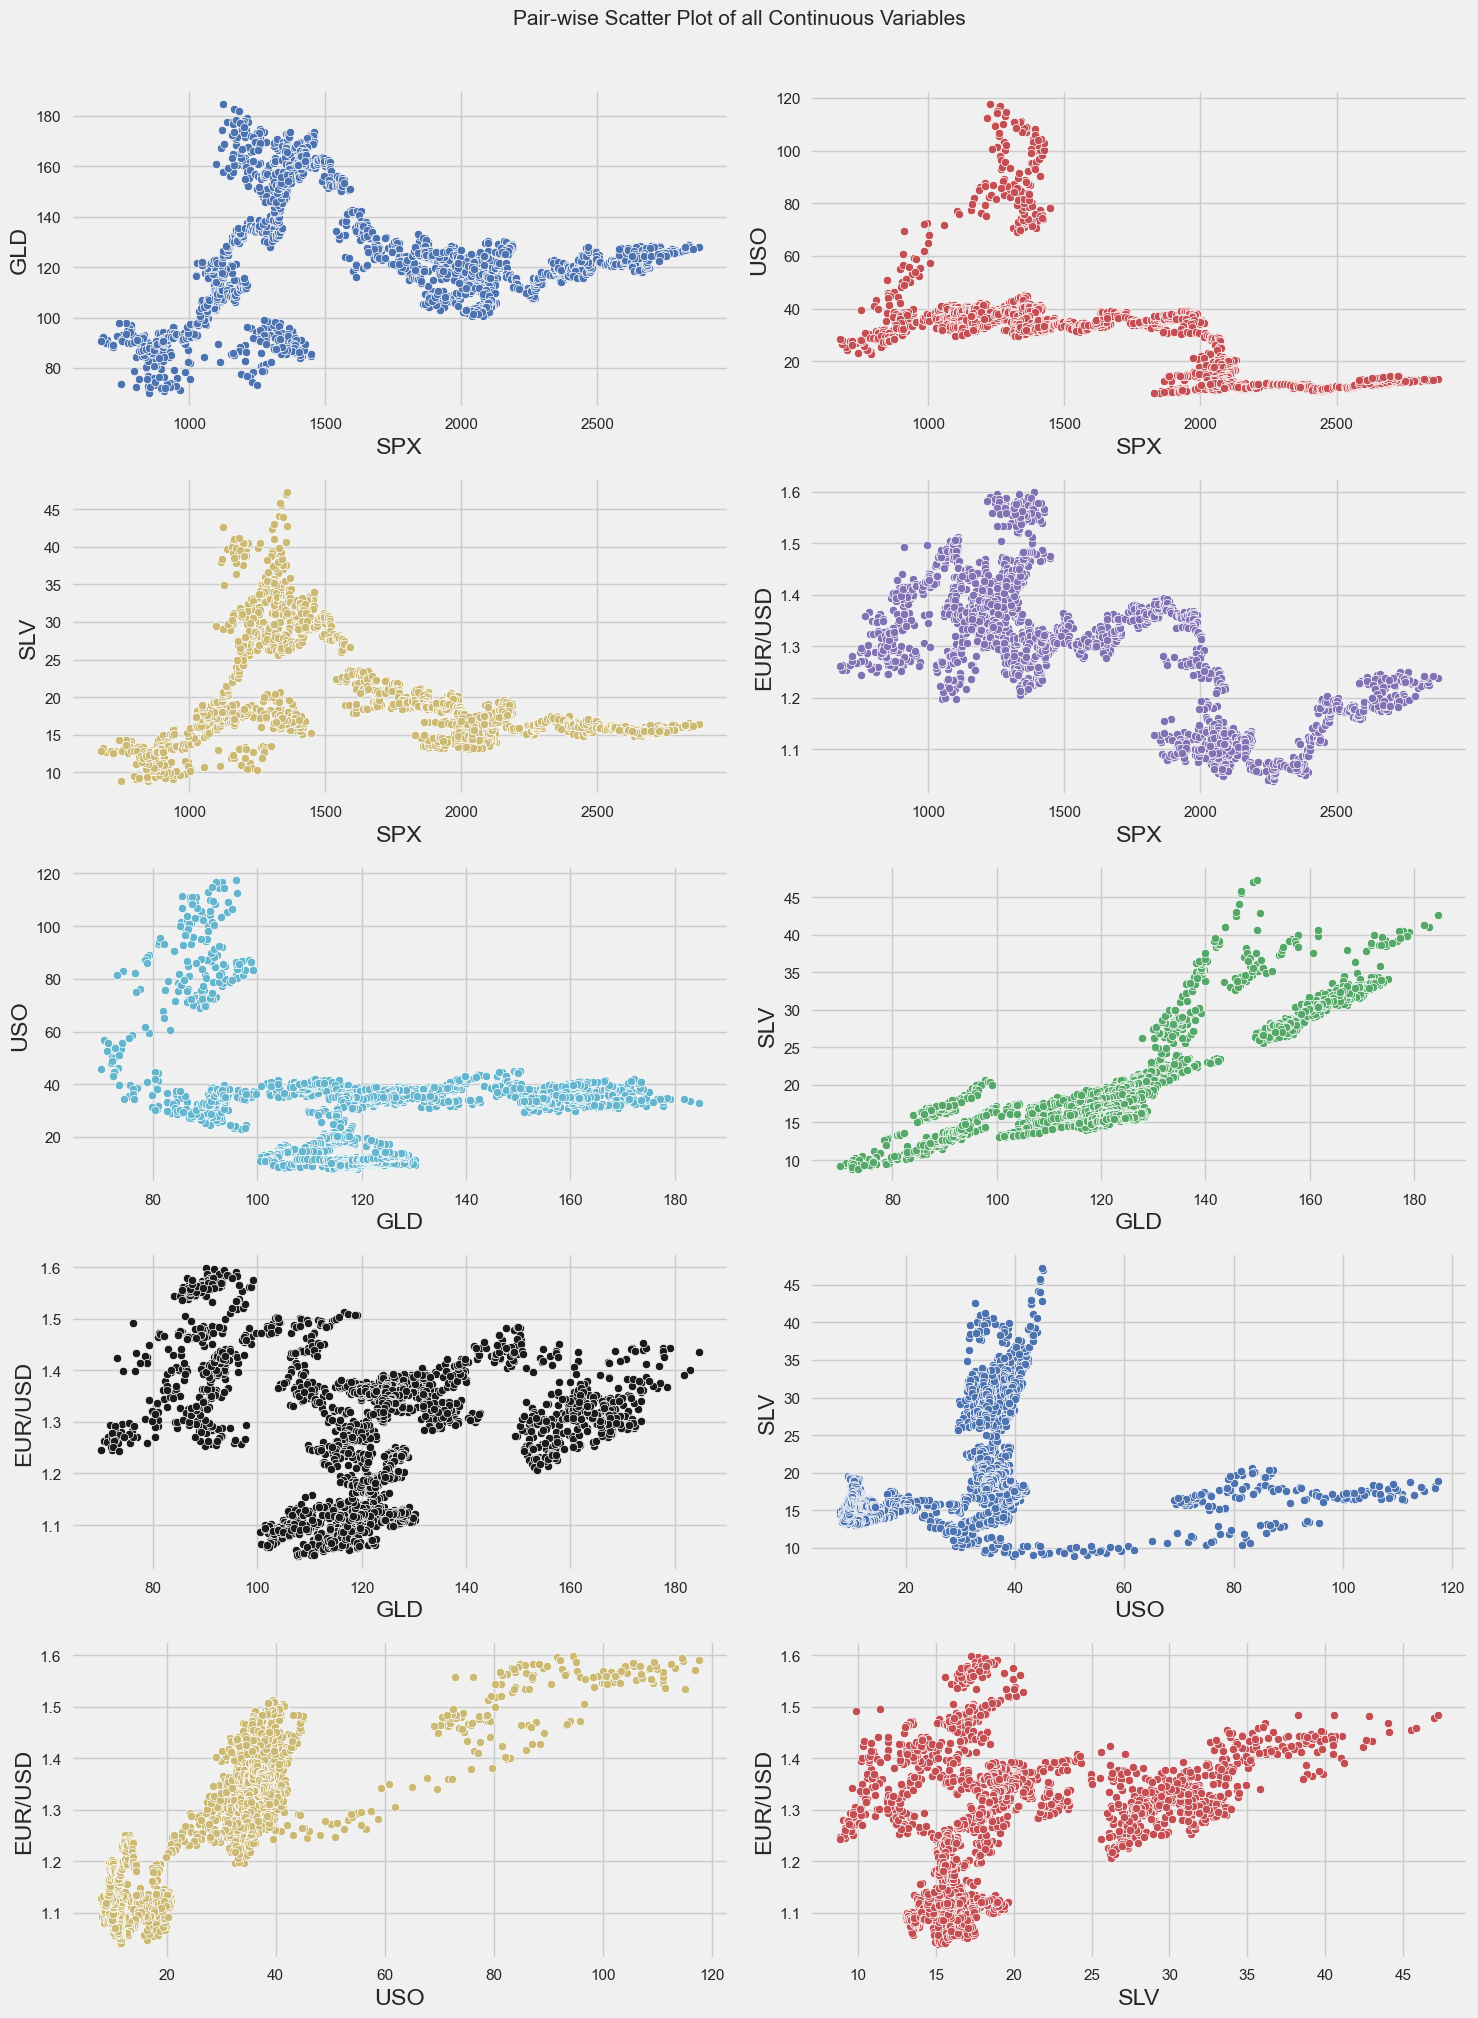

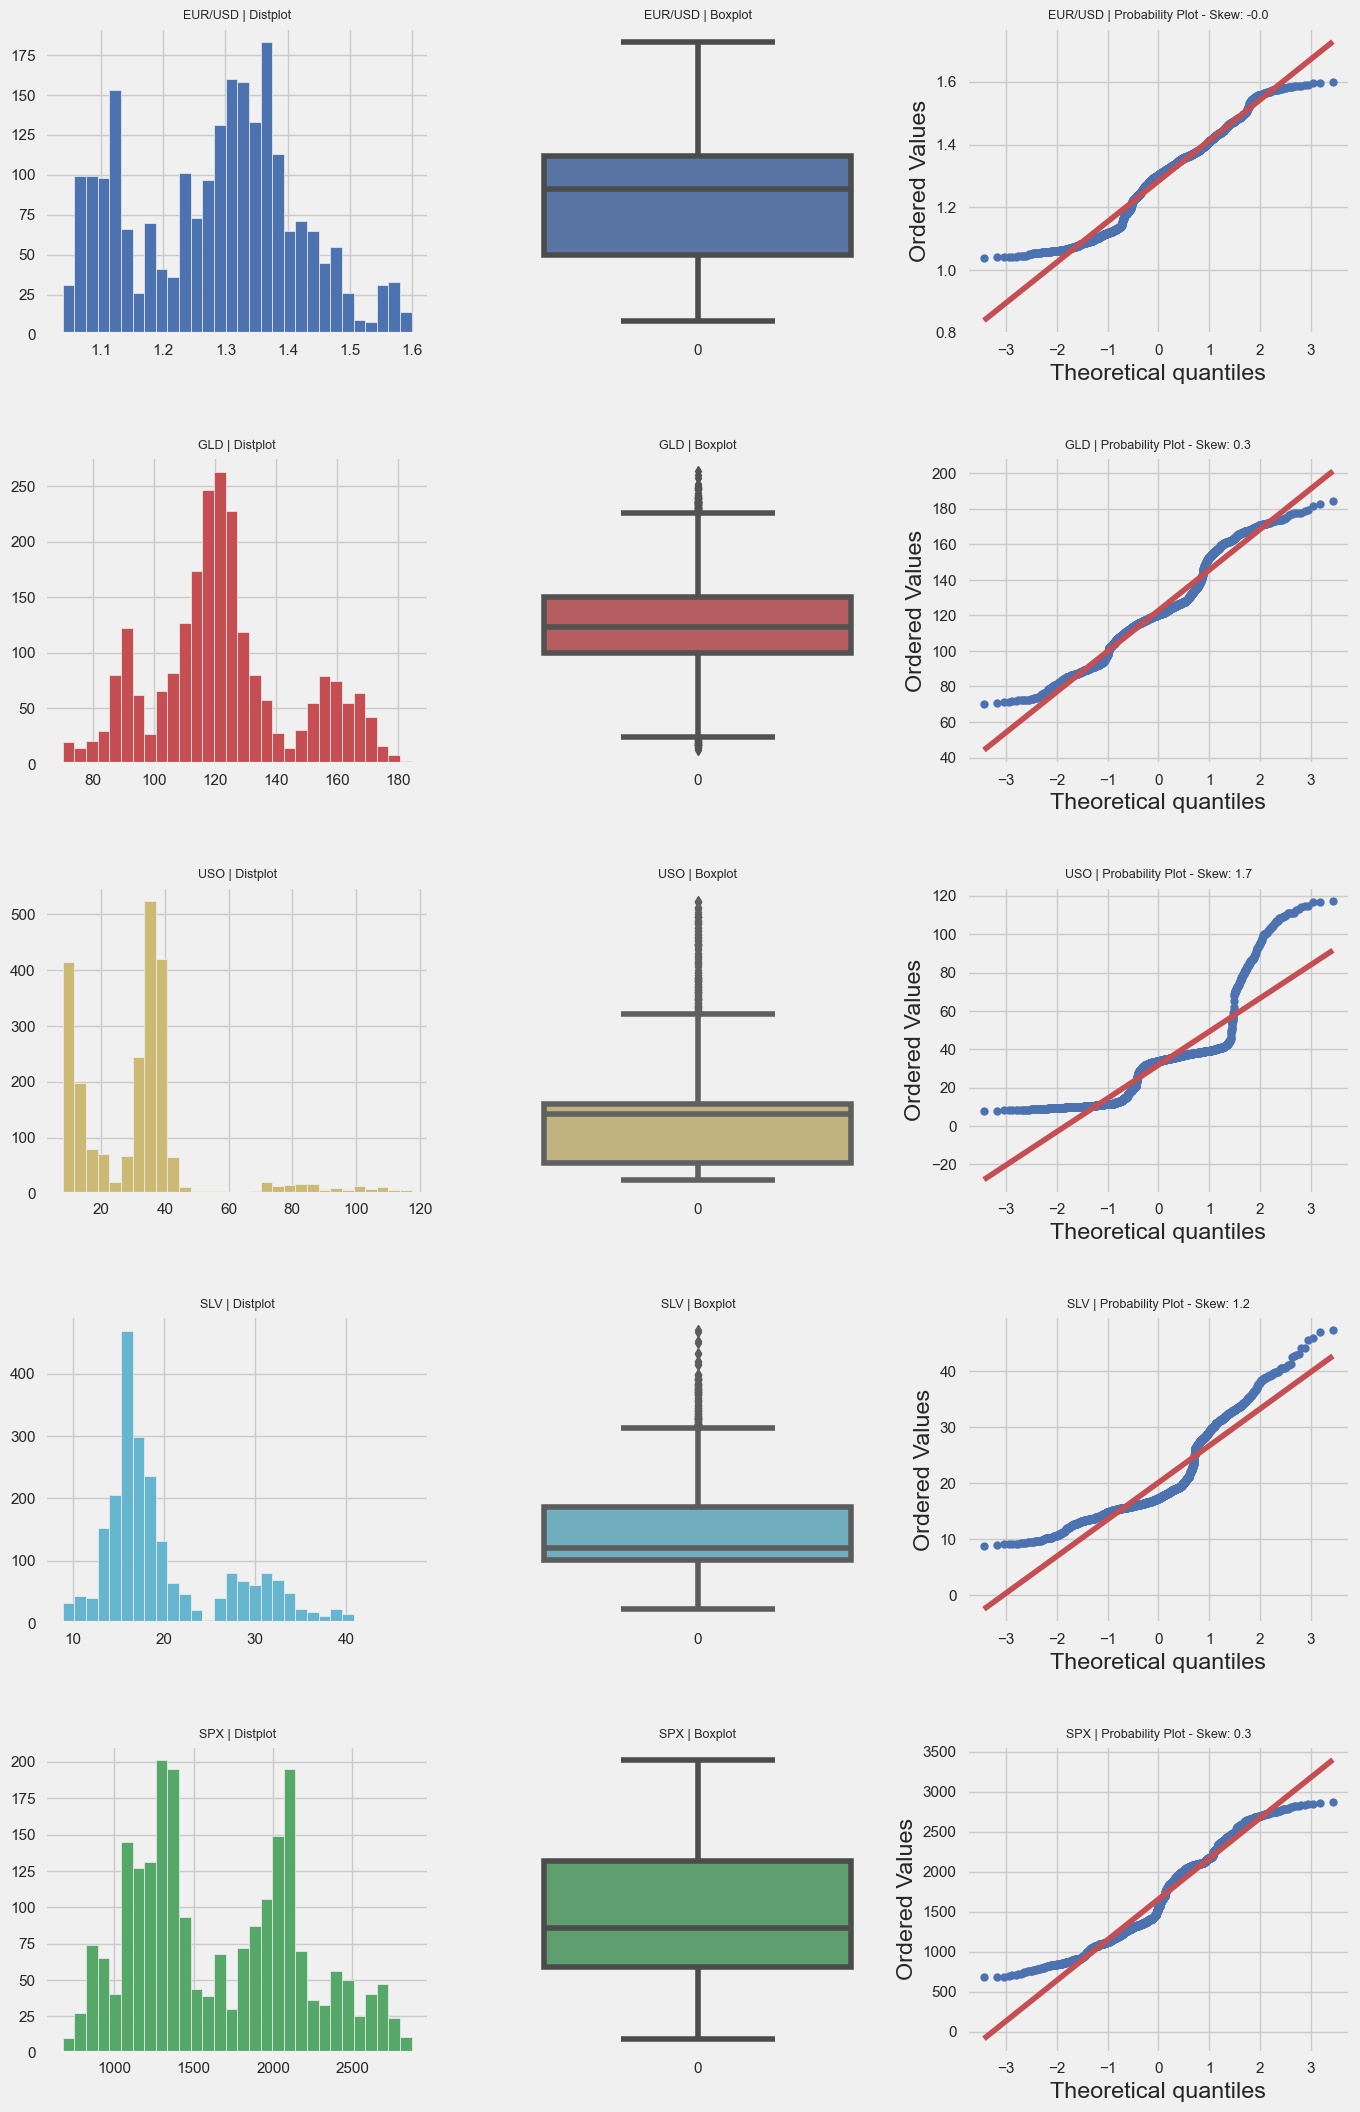

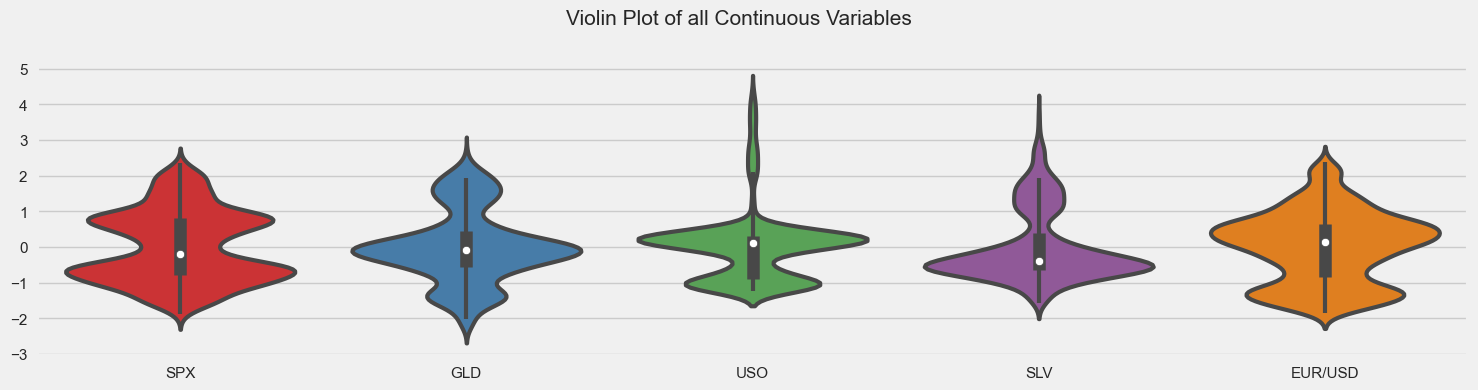

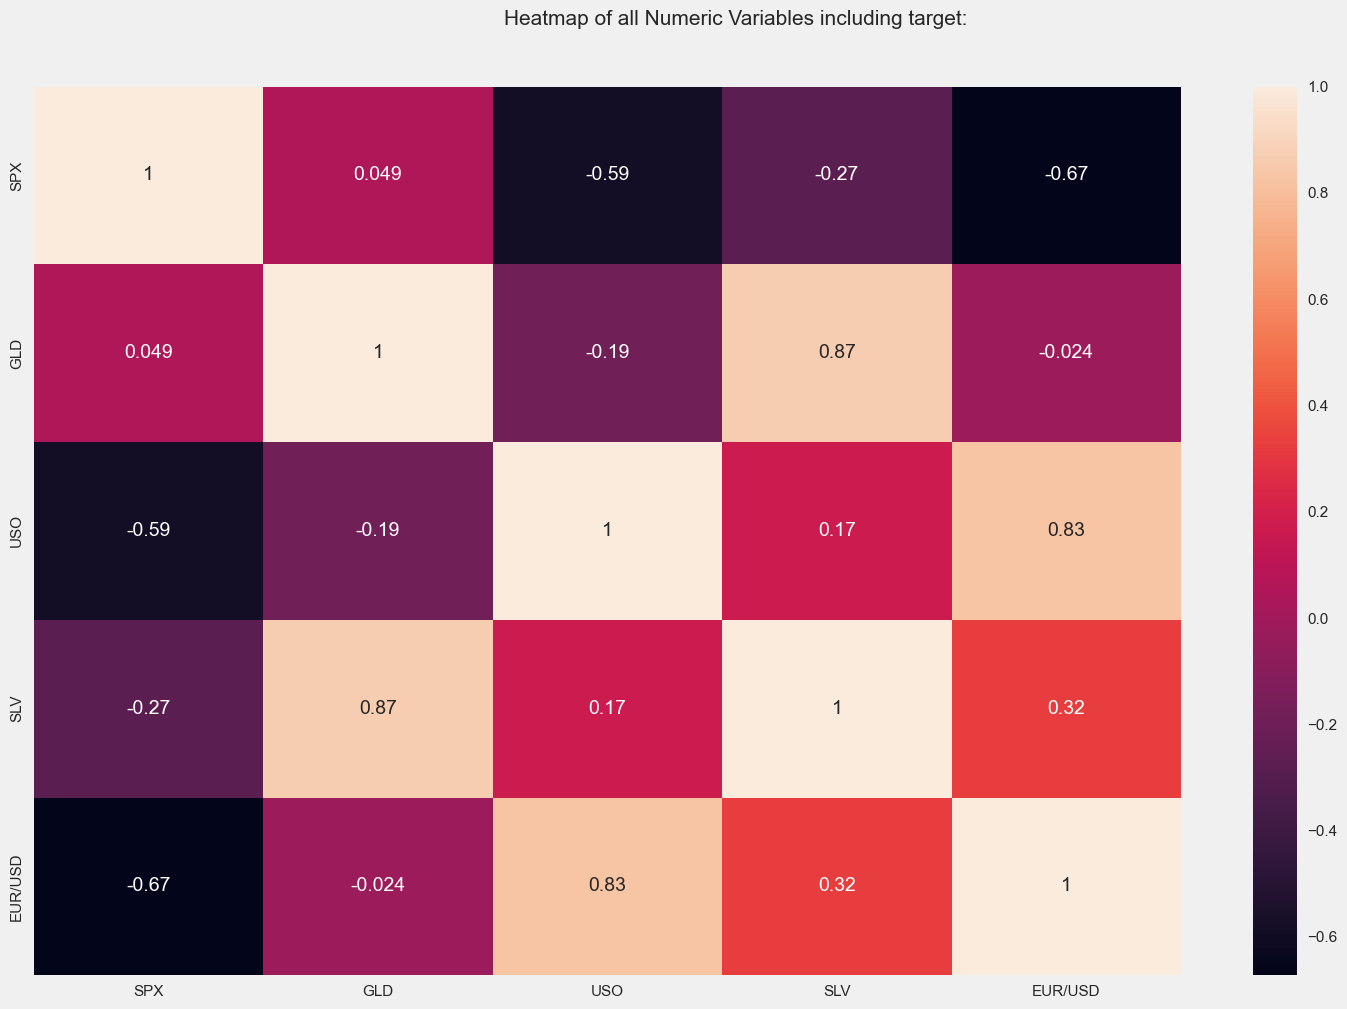

In [16]:
plt.figure(figsize = (12, 5))
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('gld_price_data.csv')
plt.show()

In [22]:
#تراکم
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

<Axes: xlabel='GLD', ylabel='Density'>

In [12]:
#Split Data
gold_data['Tom'] = gold_data['GLD'].shift(-1)
gold_data['Diff'] = gold_data['Tom'] - gold_data['GLD']
gold_data['Target'] = np.where(gold_data['Diff']<0,0,1)
gold_data = gold_data.drop(['Diff', 'Tom'], axis=1)
gold_data.tail()

Date          SPX         GLD      USO      SLV   EUR/USD  Target
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789       0
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722       1
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753       0
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118       0
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033       1

In [18]:
X = gold_data.iloc[1:,1:5]
y = gold_data.iloc[1:,-1]

In [19]:
train_size = int(0.1*len(X))
x_train = X.iloc[:train_size,:]
y_train = y.iloc[:train_size]
x_test = X.iloc[train_size:,:]
y_test = y.iloc[train_size:]

In [14]:
print(y)

1       0
2       0
3       1
4       0
5       1
       ..
2285    0
2286    1
2287    0
2288    0
2289    1
Name: Target, Length: 2289, dtype: int32


## <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">Random Forest</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Random Forest</b></mark> is a tree-based machine learning algorithm that <b>leverages the power of multiple decision trees for making decisions</b>. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. <b>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models</b>.<br>
    <center>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png" alt="RF" width="35%"><br>
    <i>🖼 Random Forest by Abhishek Sharma</i>
    </center>
    </blockquote>
</div>

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [21]:
# prediction on Test Data
test_data_prediction = regressor.predict(x_test)

In [54]:
#print(test_data_prediction)

In [22]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  -0.11730957502024197


In [56]:
print(test_data_prediction)

[168.45339893  82.02329981 116.0713002  127.68170063 120.82240121
 154.55809861 150.49699806 126.0951997  117.51859866 126.19530023
 116.7316013  171.28730056 141.49249841 167.8659985  115.34980021
 117.79360042 138.34560334 170.33000126 159.90330241 157.3419997
 155.22529977 125.49370058 176.18169979 157.10410296 125.1834006
  93.70159968  77.47290024 120.52740005 119.01639915 167.47179965
  88.31370091 125.20050024  90.95560084 117.62300051 121.12869911
 136.10950066 115.47400126 115.05500081 148.06979964 107.11040103
 104.37010252  87.10719798 126.46730036 118.00340036 152.9190988
 119.61859992 108.30250013 107.99179838  93.19350058 127.02119811
  75.25580014 113.67979935 121.36989997 111.27249898 119.01859894
 120.57549933 159.58830084 167.78160109 146.97229672  85.96279864
  94.41580044  86.88639873  90.50050019 119.03490064 126.41100077
 127.58009992 168.73980047 122.3335994  117.36059915  98.25299977
 168.50380163 143.31309837 132.13440205 121.1980023  120.87489963
 119.67830061

In [57]:
Y_test = list(Y_test)
print(Y_test)

[168.020004, 81.230003, 112.32, 127.589996, 119.620003, 154.210007, 148.910004, 126.190002, 117.470001, 125.739998, 115.379997, 167.119995, 141.630005, 169.559998, 115.599998, 119.669998, 132.949997, 170.399994, 159.369995, 173.529999, 154.720001, 128.119995, 177.720001, 157.190002, 125.309998, 93.400002, 76.790001, 119.690002, 118.989998, 167.389999, 87.5, 124.980003, 91.230003, 115.489998, 120.949997, 133.809998, 116.690002, 113.809998, 133.580002, 105.970001, 105.120003, 87.959999, 126.82, 116.860001, 159.259995, 119.459999, 109.160004, 108.620003, 93.269997, 127.160004, 72.260002, 113.470001, 119.68, 109.139999, 119.309998, 120.050003, 159.889999, 161.490005, 146.740005, 85.809998, 93.709999, 85.550003, 91.029999, 118.489998, 126.449997, 126.980003, 171.699997, 122.400002, 116.410004, 97.959999, 169.630005, 142.639999, 131.809998, 121.360001, 124.0, 119.699997, 113.889999, 118.919998, 105.639999, 127.669998, 114.32, 107.309998, 114.82, 119.230003, 86.860001, 87.010002, 147.729996, 

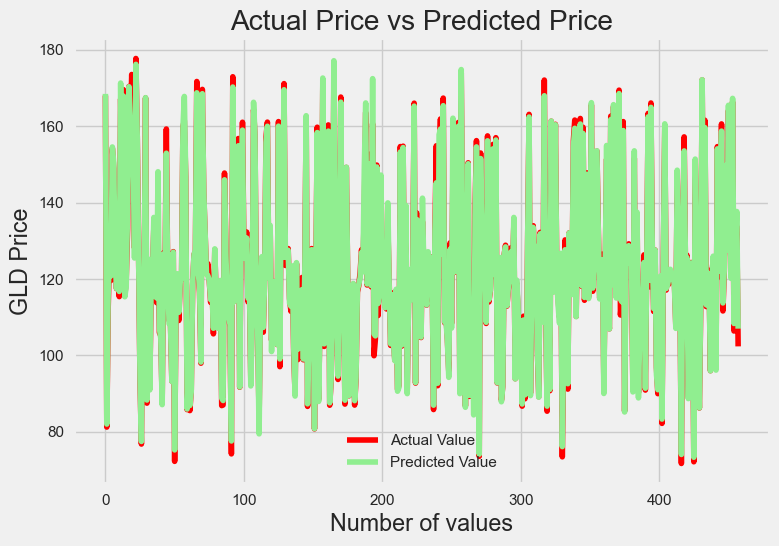

In [75]:
plt.plot(Y_test, color='red', label = 'Actual Value')
#plt.show()
plt.plot(test_data_prediction, color='lightgreen', label='Predicted Value')
#plt.show()
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()